In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pickle
import joblib
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense

In [2]:
data = pd.read_csv('diamonds.csv')

In [3]:
#data overview
print(data.head())
print(data.info())
print(data.isnull().sum())

   Unnamed: 0    cut color clarity  carat_weight cut_quality  lab   symmetry  \
0           0  Round     E    VVS2          0.09   Excellent  IGI  Very Good   
1           1  Round     E    VVS2          0.09   Very Good  IGI  Very Good   
2           2  Round     E    VVS2          0.09   Excellent  IGI  Very Good   
3           3  Round     E    VVS2          0.09   Excellent  IGI  Very Good   
4           4  Round     E    VVS2          0.09   Very Good  IGI  Very Good   

      polish eye_clean  ... meas_depth girdle_min  girdle_max  fluor_color  \
0  Very Good   unknown  ...       1.79          M           M      unknown   
1  Very Good   unknown  ...       1.78        STK         STK      unknown   
2  Very Good   unknown  ...       1.77         TN           M      unknown   
3  Very Good   unknown  ...       1.78          M         STK      unknown   
4  Excellent   unknown  ...       1.82        STK         STK      unknown   

   fluor_intensity  fancy_color_dominant_color  fa

In [4]:
#drop unnecessary columns
if 'Unnamed: 0' in data.columns:
    data = data.drop(columns=['Unnamed: 0'])

In [5]:
data = data.drop_duplicates()

In [6]:
#encode categorical variables
df = data.copy()
lnc = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = lnc.fit_transform(df[col])
    joblib.dump(lnc, f"{col}.joblib", compress=9)

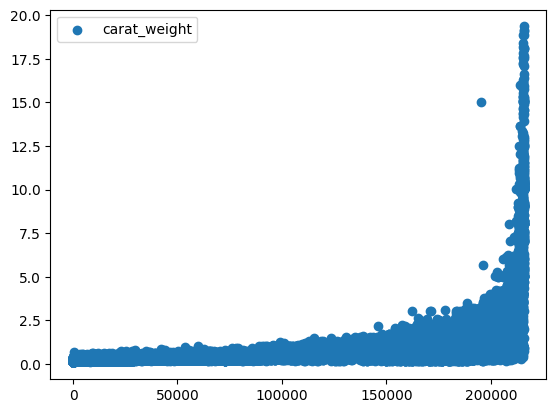

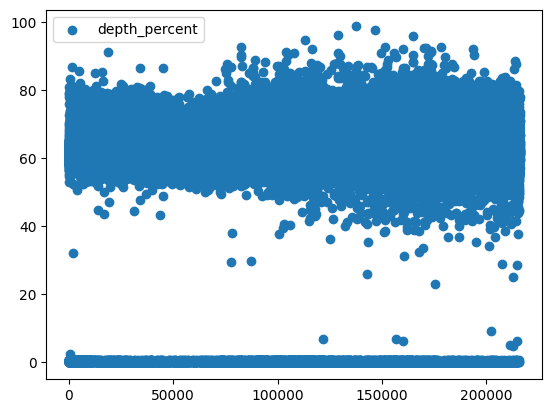

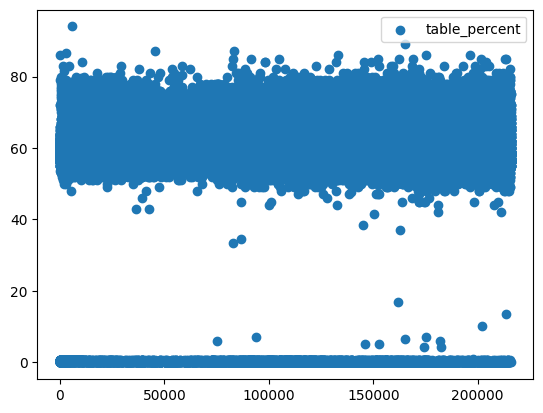

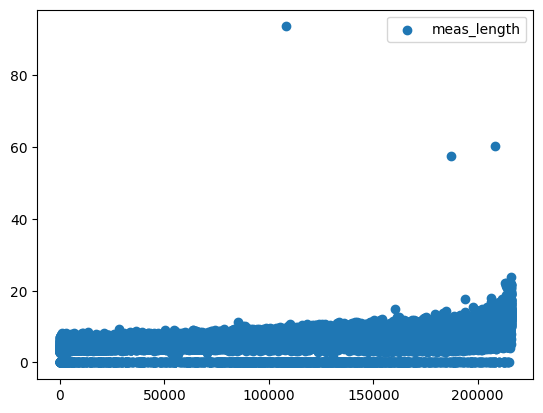

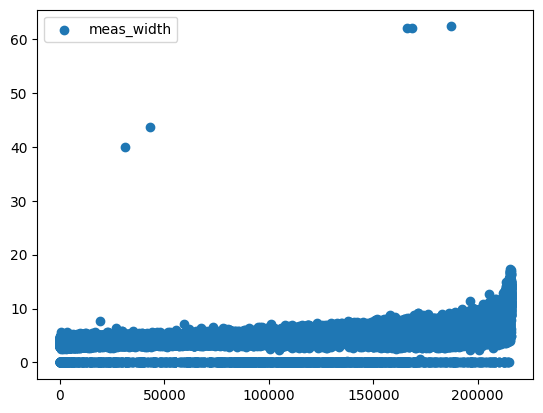

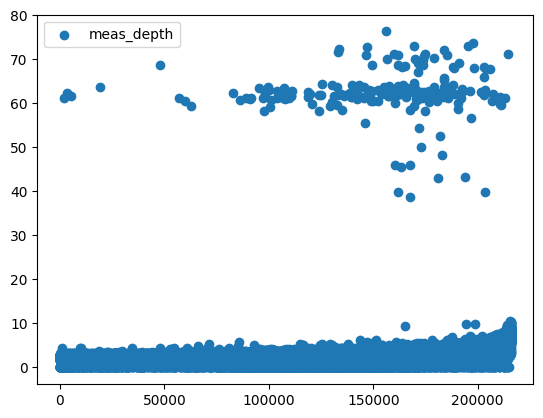

In [7]:
# Visualize float columns
for col in df.select_dtypes(include=['float64']).columns:
    plt.scatter(range(len(df[col])), df[col], label=col)
    plt.legend()
    plt.show()

In [8]:
# Filter out unrealistic measurements
df = df[(df['meas_length'] < 40) & (df['meas_width'] < 30) & (df['meas_depth'] < 30)]
df = df[(df['meas_width'] != 0) & (df['meas_depth'] != 0) & (df['meas_length'] != 0)]
df = df[(df['depth_percent'] != 0) & (df['table_percent'] != 0)]

<Axes: >

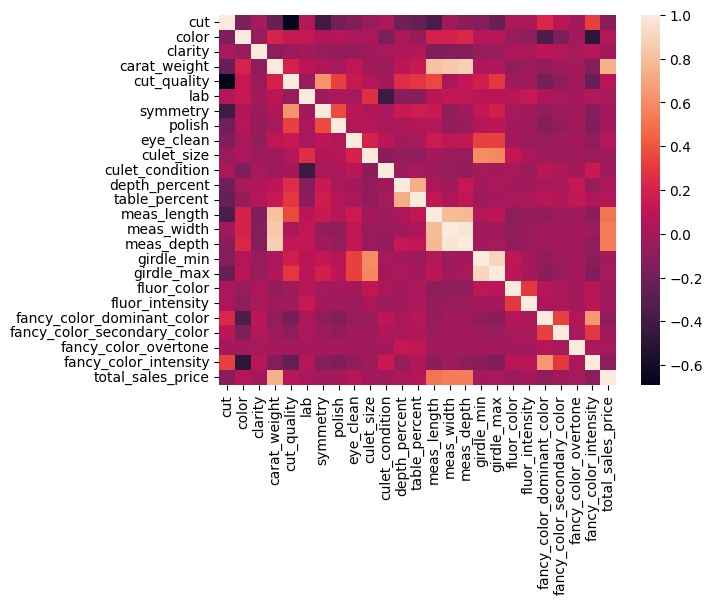

In [9]:
# Correlation heatmap
from sklearn.preprocessing import StandardScaler, MinMaxScaler
ss = MinMaxScaler()

corr = df.corr()
sns.heatmap(corr)

In [10]:
# Select features
features = [col for col in df.columns if col != 'total_sales_price']
x = df[features]
y = df['total_sales_price']

In [11]:
# Check feature scores
fs = SelectKBest(f_regression, k='all')
fs.fit(x, y)
for i, score in enumerate(fs.scores_):
    print(f"Feature {features[i]}: {score:.2f}")

Feature cut: 2350.25
Feature color: 762.75
Feature clarity: 7.40
Feature carat_weight: 262560.92
Feature cut_quality: 1256.06
Feature lab: 51.81
Feature symmetry: 15.20
Feature polish: 0.76
Feature eye_clean: 699.84
Feature culet_size: 61.60
Feature culet_condition: 93.90
Feature depth_percent: 178.10
Feature table_percent: 796.56
Feature meas_length: 73702.35
Feature meas_width: 87254.21
Feature meas_depth: 87641.85
Feature girdle_min: 0.25
Feature girdle_max: 9.20
Feature fluor_color: 191.83
Feature fluor_intensity: 1.74
Feature fancy_color_dominant_color: 1217.87
Feature fancy_color_secondary_color: 114.29
Feature fancy_color_overtone: 6.85
Feature fancy_color_intensity: 1492.60


In [12]:
# Filter top 15 features
fs = SelectKBest(f_regression, k=15)
x_new = fs.fit_transform(x, y)
selected_features = np.array(features)[fs.get_support()]
print(f"Selected Features: {selected_features}")

Selected Features: ['cut' 'color' 'carat_weight' 'cut_quality' 'eye_clean' 'culet_condition'
 'depth_percent' 'table_percent' 'meas_length' 'meas_width' 'meas_depth'
 'fluor_color' 'fancy_color_dominant_color' 'fancy_color_secondary_color'
 'fancy_color_intensity']


In [13]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=40)

In [14]:
# Linear Regression
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [15]:
print('Intercept:', mlr.intercept_)
print('Coefficients:', list(zip(selected_features, mlr.coef_)))

Intercept: 56675.30620086188
Coefficients: [(np.str_('cut'), np.float64(624.4974915032924)), (np.str_('color'), np.float64(-802.8269237171202)), (np.str_('carat_weight'), np.float64(39610.47163421321)), (np.str_('cut_quality'), np.float64(-1.0132147265299745)), (np.str_('eye_clean'), np.float64(288.8063323207556)), (np.str_('culet_condition'), np.float64(-1189.120922959701)), (np.str_('depth_percent'), np.float64(326.15411040124405)), (np.str_('table_percent'), np.float64(-342.5352413432398)), (np.str_('meas_length'), np.float64(-3118.9870273634438)), (np.str_('meas_width'), np.float64(4555.868476410178)), (np.str_('meas_depth'), np.float64(-19616.53877292922)), (np.str_('fluor_color'), np.float64(39.5019012150937)), (np.str_('fancy_color_dominant_color'), np.float64(-2020.661713409458)), (np.str_('fancy_color_secondary_color'), np.float64(107.9188914284464)), (np.str_('fancy_color_intensity'), np.float64(19.145897575160834))]


In [16]:
# Neural Network Model
model = Sequential([
    Dense(units=100, input_dim=x_train.shape[1], kernel_initializer='normal', activation='relu'),
    Dense(units=50, kernel_initializer='normal', activation='relu'),
    Dense(units=1, kernel_initializer='normal')
])

c:\Users\Hello\OneDrive\Desktop\ds projects\env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(x_train, y_train, validation_split=0.2, batch_size=2000, epochs=50, verbose=1)

Epoch 1/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 792105600.0000 - val_loss: 689522176.0000
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 821963008.0000 - val_loss: 655154880.0000
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 789225344.0000 - val_loss: 639287232.0000
Epoch 4/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 704920704.0000 - val_loss: 636703360.0000
Epoch 5/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 705673984.0000 - val_loss: 633188416.0000
Epoch 6/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 681818624.0000 - val_loss: 627638656.0000
Epoch 7/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 664658304.0000 - val_loss: 618608000.0000
Epoch 8/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 649928896.0000 - val_loss: 603368768.0000
Epoch 9/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 642577728.0000 - val_loss: 578707072.0000
Epoch 10/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 572257216.0000 - val_loss: 545218688.0000

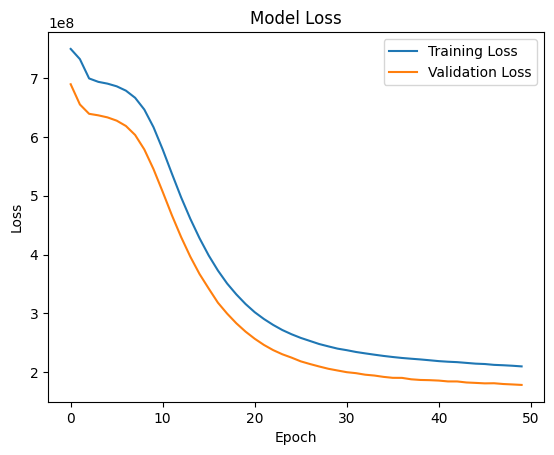

In [18]:
# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [19]:
# Predictions and evaluation
pred = model.predict(x_test)
r2 = r2_score(y_test, pred) * 100
print("R squared:", r2)

1316/1316 ━━━━━━━━━━━━━━━━━━━━ 1s 993us/step
R squared: 72.38938808441162


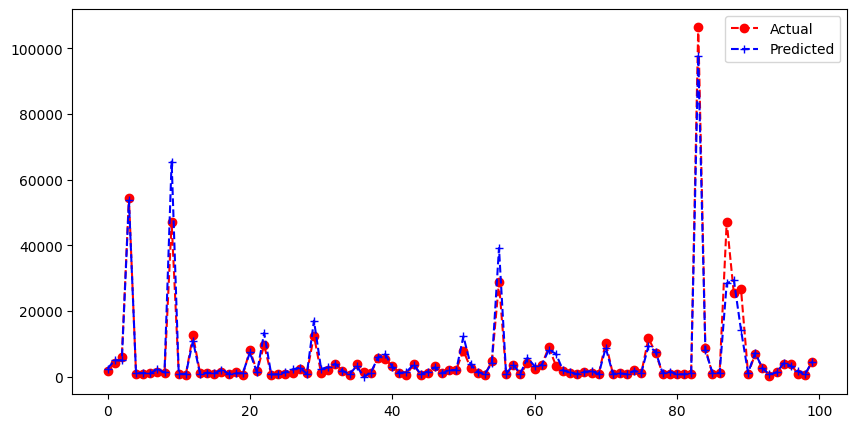

In [20]:
# Compare actual vs predicted
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[0:100], 'ro--', label='Actual')
plt.plot(pred[0:100], 'b+--', label='Predicted')
plt.legend()
plt.show()

In [21]:
# Save the model
model.save('tf_m_1.0.0.h5')

In [22]:
model.compile(
    loss='mean_squared_error',
    optimizer='adam',
    metrics=['mae']  # 'mae' is a shorthand for mean_absolute_error
)
